# Praktikum 14 | Pengolahan Citra

## Filter Gambar Berwarna
Filter gambar berwarna seperti filter rata - rata untuk reduksi noise, metode prewitt untuk   deteksi   tepi   dan   filter   sharpness, sebenarnya   hampir   sama   dengan pengolahan gambar derajat keabuan, hanya saja operasionalnya diberlakukan pada setiap nilai R, G dan B.

Fadhil Yori Hibatullah | 2103161037 | 2 D3 Teknik Informatika B

----------------------

### Import Dependency

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import random

### Load Image

In [2]:
imgNormal = imageio.imread("gambar4.jpg")

### Show Image

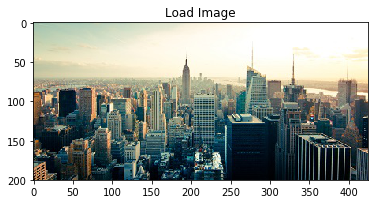

In [3]:
plt.imshow(imgNormal)
plt.title("Load Image")
plt.show()

---------------------

## Noise Gaussian

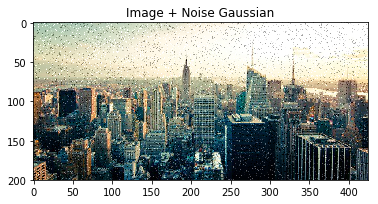

In [4]:
imgNoiseGaussianRGB = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(0, imgNormal.shape[0]):
    for x in range(0, imgNormal.shape[1]):
        p = random.randint(0,100)
        r = int(imgNormal[y][x][0])
        g = int(imgNormal[y][x][1])
        b = int(imgNormal[y][x][2])
        if p < 20:
            nr = random.randint(0, 200)
            r = r + nr - 100
            if r < 0:
                r = 0
            if r > 255:
                r = 255
            g = g + nr - 100
            if g < 0:
                g = 0
            if g > 255:
                g = 255
            b = b + nr - 100
            if b < 0:
                b = 0
            if b > 255:
                b = 255
        imgNoiseGaussianRGB[y][x] = (r, g, b)

plt.imshow(imgNoiseGaussianRGB)
plt.title("Image + Noise Gaussian")
plt.show()

---------------------

## Filter Rata - rata

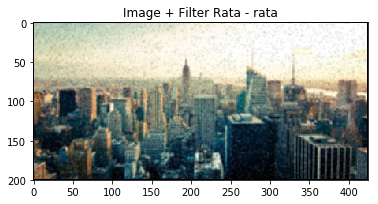

In [5]:
imgFilterRataRGB = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        w1 = imgNoiseGaussianRGB[y - 1][x - 1]
        w2 = imgNoiseGaussianRGB[y][x - 1]
        w3 = imgNoiseGaussianRGB[y + 1][x - 1]
        w4 = imgNoiseGaussianRGB[y - 1][x]
        w5 = imgNoiseGaussianRGB[y][x]
        w6 = imgNoiseGaussianRGB[y + 1][x]
        w7 = imgNoiseGaussianRGB[y - 1][x + 1]
        w8 = imgNoiseGaussianRGB[y][x + 1]
        w9 = imgNoiseGaussianRGB[y + 1][x + 1]
        r = int( ( int(w1[0]) + int(w2[0]) + int(w3[0]) + int(w4[0]) + int(w5[0]) + int(w6[0]) + int(w7[0]) + int(w8[0]) + int(w9[0]) ) / 9 )
        g = int( ( int(w1[1]) + int(w2[1]) + int(w3[1]) + int(w4[1]) + int(w5[1]) + int(w6[1]) + int(w7[1]) + int(w8[1]) + int(w9[1]) ) / 9 )
        b = int( ( int(w1[2]) + int(w2[2]) + int(w3[2]) + int(w4[2]) + int(w5[2]) + int(w6[2]) + int(w7[2]) + int(w8[2]) + int(w9[2]) ) / 9 )
        imgFilterRataRGB[y][x] = (r, g, b)

plt.imshow(imgFilterRataRGB)
plt.title("Image + Filter Rata - rata")
plt.show()

---------------------

## Deteksi Tepi

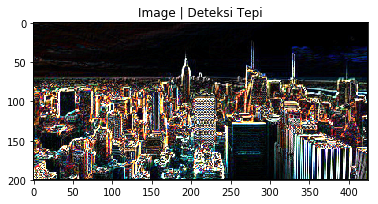

In [6]:
imgDeteksiTepi = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        w1 = imgNormal[y - 1][x - 1]
        w2 = imgNormal[y][x - 1]
        w3 = imgNormal[y + 1][x - 1]
        w4 = imgNormal[y - 1][x]
        w5 = imgNormal[y][x]
        w6 = imgNormal[y + 1][x]
        w7 = imgNormal[y - 1][x + 1]
        w8 = imgNormal[y][x + 1]
        w9 = imgNormal[y + 1][x + 1]
        rh = int( -int(w1[0]) - int(w4[0]) - int(w7[0]) + int(w3[0]) + int(w6[0]) + int(w9[0]) )
        gh = int( -int(w1[1]) - int(w4[1]) - int(w7[1]) + int(w3[1]) + int(w6[1]) + int(w9[1]) )
        bh = int( -int(w1[2]) - int(w4[2]) - int(w7[2]) + int(w3[2]) + int(w6[2]) + int(w9[2]) )
        rv = int( -int(w1[0]) - int(w2[0]) - int(w3[0]) + int(w7[0]) + int(w8[0]) + int(w9[0]) )
        gv = int( -int(w1[1]) - int(w2[1]) - int(w3[1]) + int(w7[1]) + int(w8[1]) + int(w9[1]) )
        bv = int( -int(w1[2]) - int(w2[2]) - int(w3[2]) + int(w7[2]) + int(w8[2]) + int(w9[2]) )
        r = int(rh + rv)
        if r < 0:
            r = -r
        if r > 255:
            r = 255
        g = int(gh + gv)
        if g < 0:
            g = -g
        if g > 255:
            g = 255
        b = int(bh + bv)
        if b < 0:
            b = -b
        if b > 255:
            b = 255
        imgDeteksiTepi[y][x] = (r, g, b)

plt.imshow(imgDeteksiTepi)
plt.title("Image | Deteksi Tepi")
plt.show()

---------------------

## Sharpness

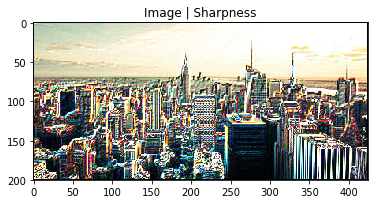

In [7]:
imgSharpness = np.zeros((imgNormal.shape[0], imgNormal.shape[1], 3), dtype=np.uint8)

for y in range(1, imgNormal.shape[0] - 1):
    for x in range(1, imgNormal.shape[1] - 1):
        w1 = imgNormal[y - 1][x - 1]
        w2 = imgNormal[y][x - 1]
        w3 = imgNormal[y + 1][x - 1]
        w4 = imgNormal[y - 1][x]
        w5 = imgNormal[y][x]
        w6 = imgNormal[y + 1][x]
        w7 = imgNormal[y - 1][x + 1]
        w8 = imgNormal[y][x + 1]
        w9 = imgNormal[y + 1][x + 1]
        rh = int( -int(w1[0]) - int(w4[0]) - int(w7[0]) + int(w3[0]) + int(w6[0]) + int(w9[0]) )
        gh = int( -int(w1[1]) - int(w4[1]) - int(w7[1]) + int(w3[1]) + int(w6[1]) + int(w9[1]) )
        bh = int( -int(w1[2]) - int(w4[2]) - int(w7[2]) + int(w3[2]) + int(w6[2]) + int(w9[2]) )
        rv = int( -int(w1[0]) - int(w2[0]) - int(w3[0]) + int(w7[0]) + int(w8[0]) + int(w9[0]) )
        gv = int( -int(w1[1]) - int(w2[1]) - int(w3[1]) + int(w7[1]) + int(w8[1]) + int(w9[1]) )
        bv = int( -int(w1[2]) - int(w2[2]) - int(w3[2]) + int(w7[2]) + int(w8[2]) + int(w9[2]) )
        rr = int( ( int(w1[0]) + int(w2[0]) + int(w3[0]) + int(w4[0]) + int(w5[0]) + int(w6[0]) + int(w7[0]) + int(w8[0]) + int(w9[0]) ) / 9 )
        gg = int( ( int(w1[1]) + int(w2[1]) + int(w3[1]) + int(w4[1]) + int(w5[1]) + int(w6[1]) + int(w7[1]) + int(w8[1]) + int(w9[1]) ) / 9 )
        bb = int( ( int(w1[2]) + int(w2[2]) + int(w3[2]) + int(w4[2]) + int(w5[2]) + int(w6[2]) + int(w7[2]) + int(w8[2]) + int(w9[2]) ) / 9 )
        r = int(rr + rh + rv)
        if r < 0:
            r = -r
        if r > 255:
            r = 255
        g = int(gg + gh + gv)
        if g < 0:
            g = -g
        if g > 255:
            g = 255
        b = int(bb + bh + bv)
        if b < 0:
            b = -b
        if b > 255:
            b = 255
        imgSharpness[y][x] = (r, g, b)

plt.imshow(imgSharpness)
plt.title("Image | Sharpness")
plt.show()